<a href="https://colab.research.google.com/github/moaoa/deep-learning/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [137]:
# prompt: install pandas and tensorflow and seaborn and import them

!pip install pandas
!pip install tensorflow
!pip install seaborn

import pandas as pd
import tensorflow as tf
import seaborn as sns
from tensorflow.keras.layers import Normalization, Dense, InputLayer
from tensorflow.keras.losses import MeanSquaredError, Huber, MeanAbsoluteError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import RootMeanSquaredError
import matplotlib.pyplot as plt





In [138]:

# Read the data from the CSV file
df = pd.read_csv("train.csv")

# Display the data
print(df.head())


   v.id  on road old  on road now  years      km  rating  condition  economy  \
0     1       535651       798186      3   78945       1          2       14   
1     2       591911       861056      6  117220       5          9        9   
2     3       686990       770762      2  132538       2          8       15   
3     4       573999       722381      4  101065       4          3       11   
4     5       691388       811335      6   61559       3          9       12   

   top speed  hp  torque  current price  
0        177  73     123       351318.0  
1        148  74      95       285001.5  
2        181  53      97       215386.0  
3        197  54     116       244295.5  
4        160  53     105       531114.5  


In [139]:
# prompt: using the seaborn lib use the methdo show pair to show the data

# sns.pairplot(df, diag_kind='kde')


In [140]:
tensor_df = tf.convert_to_tensor(df, tf.float32)

print(tensor_df)

tf.Tensor(
[[1.000000e+00 5.356510e+05 7.981860e+05 ... 7.300000e+01 1.230000e+02
  3.513180e+05]
 [2.000000e+00 5.919110e+05 8.610560e+05 ... 7.400000e+01 9.500000e+01
  2.850015e+05]
 [3.000000e+00 6.869900e+05 7.707620e+05 ... 5.300000e+01 9.700000e+01
  2.153860e+05]
 ...
 [9.980000e+02 6.463440e+05 8.427330e+05 ... 1.130000e+02 8.900000e+01
  4.058710e+05]
 [9.990000e+02 5.355590e+05 7.324390e+05 ... 1.120000e+02 1.280000e+02
  7.439800e+04]
 [1.000000e+03 5.901050e+05 7.797430e+05 ... 9.900000e+01 9.600000e+01
  4.149385e+05]], shape=(1000, 12), dtype=float32)


In [141]:
x = tensor_df[:, 3:-1]

print(x[:8])

tf.Tensor(
[[3.00000e+00 7.89450e+04 1.00000e+00 2.00000e+00 1.40000e+01 1.77000e+02
  7.30000e+01 1.23000e+02]
 [6.00000e+00 1.17220e+05 5.00000e+00 9.00000e+00 9.00000e+00 1.48000e+02
  7.40000e+01 9.50000e+01]
 [2.00000e+00 1.32538e+05 2.00000e+00 8.00000e+00 1.50000e+01 1.81000e+02
  5.30000e+01 9.70000e+01]
 [4.00000e+00 1.01065e+05 4.00000e+00 3.00000e+00 1.10000e+01 1.97000e+02
  5.40000e+01 1.16000e+02]
 [6.00000e+00 6.15590e+04 3.00000e+00 9.00000e+00 1.20000e+01 1.60000e+02
  5.30000e+01 1.05000e+02]
 [6.00000e+00 1.48846e+05 2.00000e+00 9.00000e+00 1.30000e+01 1.38000e+02
  6.10000e+01 1.09000e+02]
 [5.00000e+00 7.80250e+04 1.00000e+00 9.00000e+00 1.50000e+01 1.71000e+02
  9.40000e+01 1.32000e+02]
 [6.00000e+00 7.65460e+04 1.00000e+00 2.00000e+00 1.20000e+01 1.46000e+02
  1.09000e+02 9.60000e+01]], shape=(8, 8), dtype=float32)


In [142]:
y = tf.expand_dims(tensor_df[:, -1], axis=-1)

print(y[:8])

tf.Tensor(
[[351318. ]
 [285001.5]
 [215386. ]
 [244295.5]
 [531114.5]
 [177933.5]
 [410877. ]
 [467471.5]], shape=(8, 1), dtype=float32)


In [143]:
normalizer = Normalization(axis=-1)

# x_normalized = tf.constant([
#         [3, 2, 5, 6, 7, 2, 5, 1],
#         [3, 4, 5, 6, 4, 2, 5, 1],
#         [4, 7, 6, 2, 8, 2, 5, 1]
#       ])

normalizer.adapt(x)

print(normalizer(x))

tf.Tensor(
[[-0.9084985  -0.7320671  -1.4178834  ...  0.524257   -0.56303626
   0.93010384]
 [ 0.8374949   0.5816051   1.4350008  ... -0.9799913  -0.5142717
  -0.40017724]
 [-1.4904963   1.1073486  -0.7046623  ...  0.7317395  -1.5383282
  -0.30515718]
 ...
 [ 1.4194927  -0.4651454  -1.4178834  ...  1.509799    1.3875475
  -0.68523747]
 [-1.4904963   1.3798648   0.72177976 ...  0.8873514   1.3387829
   1.167654  ]
 [ 0.25549713 -1.1319177   0.72177976 ...  1.6654109   0.70484316
  -0.3526672 ]], shape=(1000, 8), dtype=float32)


In [144]:
model = tf.keras.Sequential([
    InputLayer(input_shape=(8, )),
    normalizer,
    Dense(1)
])

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_8 (Normaliza  (None, 8)                 17        
 tion)                                                           
                                                                 
 dense_9 (Dense)             (None, 1)                 9         
                                                                 
Total params: 26 (108.00 Byte)
Trainable params: 9 (36.00 Byte)
Non-trainable params: 17 (72.00 Byte)
_________________________________________________________________


In [145]:
TRAIN_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1
DATASET_SIZE = len(x)

print(DATASET_SIZE)
X_train = x[:int(DATASET_SIZE * TRAIN_RATIO)]
Y_train = y[:int(DATASET_SIZE * TRAIN_RATIO)]


print(X_train.shape)
print(Y_train.shape)

X_val = x[int(DATASET_SIZE * TRAIN_RATIO):int(DATASET_SIZE * (TRAIN_RATIO + VAL_RATIO))]
Y_val = y[int(DATASET_SIZE * TRAIN_RATIO):int(DATASET_SIZE * (TRAIN_RATIO + VAL_RATIO))]


print(X_val.shape)
print(Y_val.shape)

X_test = x[int(DATASET_SIZE * (TRAIN_RATIO + VAL_RATIO)):]
Y_test = y[int(DATASET_SIZE * (TRAIN_RATIO + VAL_RATIO)):]


print(X_test.shape)
print(Y_test.shape)

1000
(800, 8)
(800, 1)
(100, 8)
(100, 1)
(100, 8)
(100, 1)


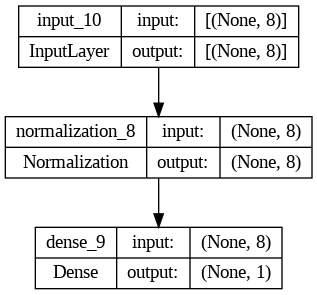

In [146]:
tf.keras.utils.plot_model(model, to_file="model.png", show_shapes=True)

In [147]:
model.compile(optimizer=Adam(), loss = MeanAbsoluteError(), metrics=[RootMeanSquaredError()])

model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=100)

Epoch 1/100
25/25 [==============================] - 1s 12ms/step - loss: 313282.1250 - root_mean_squared_error: 337791.5938 - val_loss: 273467.2188 - val_root_mean_squared_error: 300015.0938
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 313282.1250 - root_mean_squared_error: 337791.5625 - val_loss: 273467.1875 - val_root_mean_squared_error: 300015.0625
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 313282.1250 - root_mean_squared_error: 337791.5625 - val_loss: 273467.1562 - val_root_mean_squared_error: 300015.0312
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 313282.0625 - root_mean_squared_error: 337791.5000 - val_loss: 273467.1250 - val_root_mean_squared_error: 300015.0312
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 313282.0312 - root_mean_squared_error: 337791.5000 - val_loss: 273467.1250 - val_root_mean_squared_error: 300015.0312
Epoch 6/100
25/25 [=========================

{'loss': [313282.125, 313282.125, 313282.125, 313282.0625, 313282.03125, 313282.09375, 313282.0, 313281.9375, 313281.96875, 313281.9375, 313281.875, 313281.875, 313281.8125, 313281.8125, 313281.78125, 313281.78125, 313281.6875, 313281.6875, 313281.6875, 313281.65625, 313281.65625, 313281.59375, 313281.59375, 313281.59375, 313281.53125, 313281.53125, 313281.46875, 313281.46875, 313281.4375, 313281.40625, 313281.375, 313281.34375, 313281.3125, 313281.28125, 313281.25, 313281.25, 313281.25, 313281.1875, 313281.15625, 313281.125, 313281.125, 313281.09375, 313281.09375, 313281.03125, 313281.03125, 313281.03125, 313280.96875, 313280.96875, 313280.96875, 313280.90625, 313280.90625, 313280.875, 313280.875, 313280.8125, 313280.71875, 313280.71875, 313280.71875, 313280.6875, 313280.65625, 313280.625, 313280.625, 313280.5625, 313280.53125, 313280.59375, 313280.53125, 313280.5, 313280.46875, 313280.4375, 313280.40625, 313280.40625, 313280.40625, 313280.34375, 313280.3125, 313280.3125, 313280.3125,

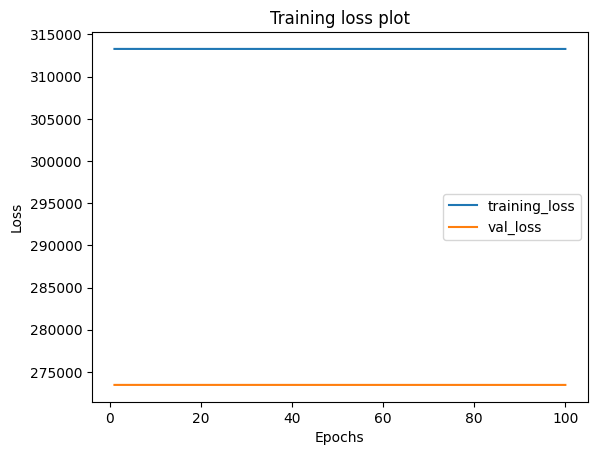

In [148]:
# prompt: plot the loss agains epochs using plot lib


history = model.history.history
print(history)
loss = history['loss']
val_loss = history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Val loss')

plt.xlabel('Epochs')

plt.ylabel('Loss')

plt.title('Training loss plot')

plt.legend(["training_loss", "val_loss"])

plt.show()


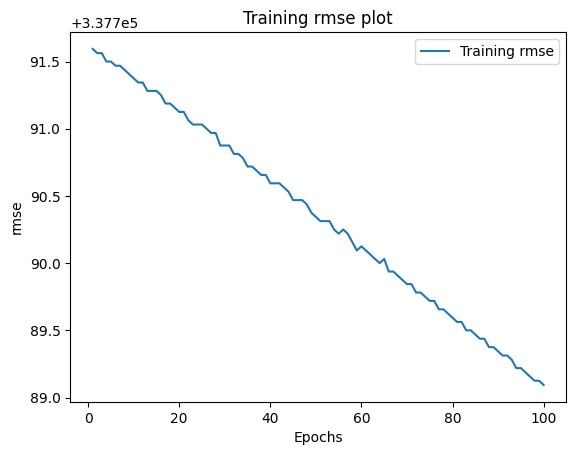

In [149]:
# prompt: plot the loss agains epochs using plot lib

history = model.history.history

rmse = history['root_mean_squared_error']

epochs = range(1, len(rmse) + 1)

plt.plot(epochs, rmse, label='Training rmse')

plt.xlabel('Epochs')

plt.ylabel('rmse')

plt.title('Training rmse plot')

plt.legend()

plt.show()


In [150]:
model.evaluate(x, y)
# 5:54

32/32 [==============================] - 0s 1ms/step - loss: 308517.7188 - root_mean_squared_error: 333259.2812


[308517.71875, 333259.28125]